# Chapter xx

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [267]:
from heapq import heapify, heappush, heappop

def is_heap(heap):
    """Check if a sequence has the heap property.
    
    Every child should be >= its parent.
    """
    for i in range(1, len(heap)):
        parent = (i-1) // 2
        if heap[parent] > heap[i]:
            return False
    return True

In [268]:
from random import shuffle

data = list(range(1, 10))
shuffle(data)
data

[1, 3, 9, 7, 4, 5, 2, 6, 8]

In [269]:
is_heap(data)

False

In [270]:
# test the constructor

heap = []

for x in data:
    heappush(heap, x)
    
heap

[1, 3, 2, 6, 4, 9, 5, 7, 8]

In [271]:
is_heap(heap)

True

In [216]:
def is_sorted(t):
    return t == sorted(t)

In [217]:
def iterate_heap(heap):
    while heap:
        yield heappop(heap)

In [218]:
t = list(iterate_heap(heap))
t

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [219]:
is_sorted(t)

True

In [206]:
def heapsort(iterable):
    heap = [x for x in iterable]
    heapify(heap)
    return list(iterate_heap(heap))

In [207]:
t = heapsort(data)
t

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [209]:
is_heap(data)

False

In [220]:
heap = data.copy()
heapify(heap)
heap

[1, 2, 3, 6, 5, 4, 9, 8, 7]

In [221]:
is_heap(heap)

True

In [273]:
import networkx as nx

def make_dag(heap):
    """Make a NetworkX graph that represents the heap."""
    G = nx.DiGraph()
    
    for i in range(1, len(heap)):
        G.add_edge((i-1)//2, i)
    
    return G

In [246]:
G = make_dag(heap)
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8))

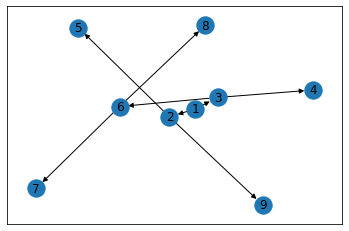

In [276]:
labels = dict(enumerate(heap))
nx.draw_networkx(G, labels=labels)

## Drawing Trees

One of the better functions for drawing trees is part of a package called `EoN`, for "Epidemics on Networks", which provides "tools to study the spread of SIS and SIR diseases in networks".

The function we'll use is called [hierarchy_pos](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.hierarchy_pos.html#EoN.hierarchy_pos).
It takes as a parameter a NetworkX graph that represents a tree, and it returns a dictionary that maps from each node to a position in the Cartesian plane.
If we pass this dictionary to `nx.draw`, it lays the tree out accordingly.

In [277]:
!pip install EoN

In [278]:
from EoN import hierarchy_pos

def draw_heap(heap):
    G = make_dag(heap)
    pos = hierarchy_pos(G)
    labels = dict(enumerate(heap))
    nx.draw(G, pos, labels=labels, alpha=0.4)

[1, 3, 2, 6, 4, 9, 5, 7, 8]


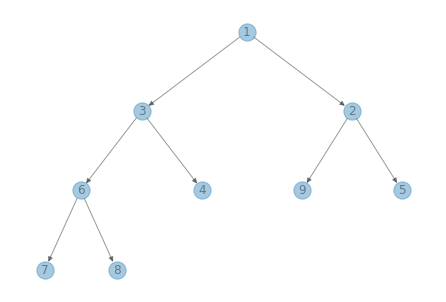

In [279]:
print(heap)
draw_heap(heap)